In [7]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


In [23]:
# Load the dataset
df = pd.read_csv('ottdata.csv')
df.head()

,visitors,ad_impressions,major_sports_event,genre,dayofweek,season,views_trailer,views_content
0,1.67,1113.81,0,Horror,Wednesday,Spring,56.70,0.51
1,1.46,1498.41,1,Thriller,Friday,Fall,52.69,0.32
2,1.47,1079.19,1,Thriller,Wednesday,Fall,48.74,0.39
3,1.85,1342.77,1,Sci-Fi,Friday,Fall,49.81,0.44
4,1.46,1498.41,0,Sci-Fi,Sunday,Winter,55.83,0.46


In [25]:
# Check for nulls and data types
df.info()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   visitors            1000 non-null   float64
 1   ad_impressions      1000 non-null   float64
 2   major_sports_event  1000 non-null   int64  
 3   genre               1000 non-null   object 
 4   dayofweek           1000 non-null   object 
 5   season              1000 non-null   object 
 6   views_trailer       1000 non-null   float64
 7   views_content       1000 non-null   float64
dtypes: float64(4), int64(1), object(3)
memory usage: 62.6+ KB


visitors              0
ad_impressions        0
major_sports_event    0
genre                 0
dayofweek             0
season                0
views_trailer         0
views_content         0
dtype: int64

In [102]:
# Define feature columns and target
X = df.drop('views_content', axis=1)
y = df['views_content']

# Identify categorical columns
categorical_cols = ['genre', 'dayofweek', 'season']

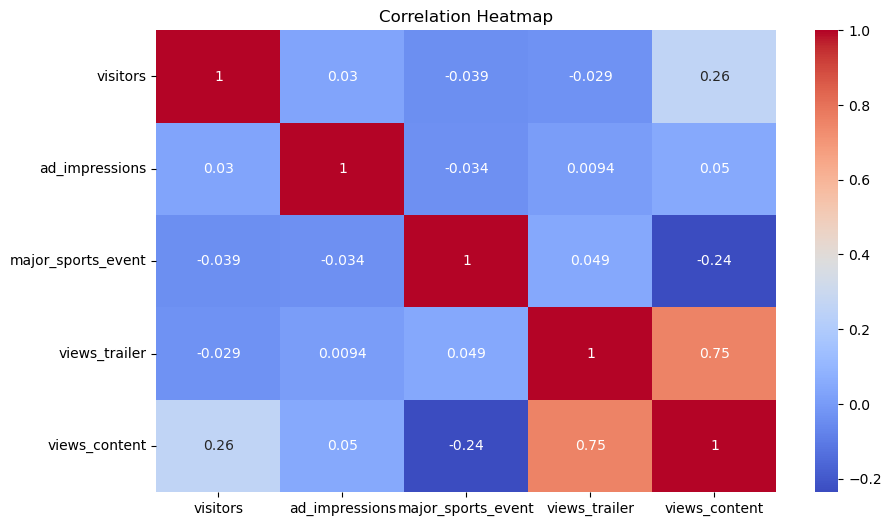

In [42]:
# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

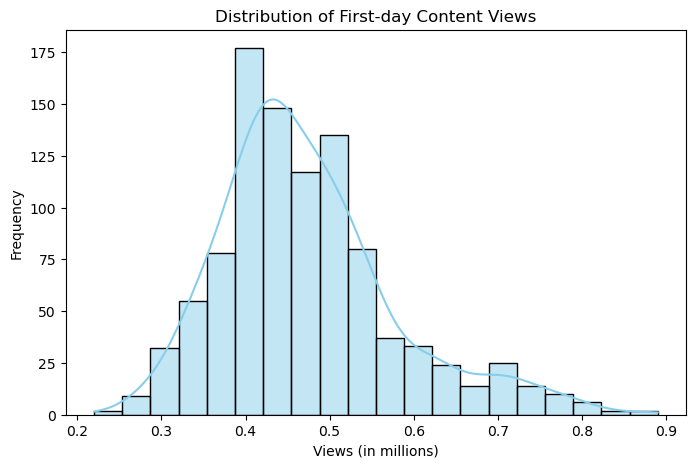

In [54]:
# Distribution of First-day Content Views
plt.figure(figsize=(8, 5))
sns.histplot(df['views_content'], kde=True, bins=20, color='skyblue')
plt.title('Distribution of First-day Content Views')
plt.xlabel('Views (in millions)')
plt.ylabel('Frequency')
plt.show()

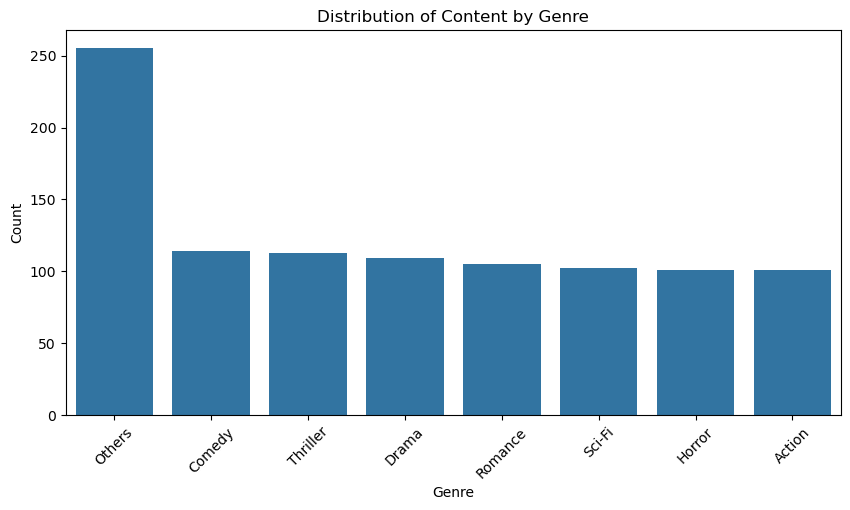

In [60]:
# Distribution of content across genres
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='genre', order=df['genre'].value_counts().index)
plt.title('Distribution of Content by Genre')
plt.xticks(rotation=45)
plt.xlabel('Genre')
plt.ylabel('Count')
plt.show()


/var/folders/qn/pvyqmzfs4l7c6j9lg9ks9_x00000gn/T/ipykernel_1710/3137294387.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='dayofweek', y='views_content',


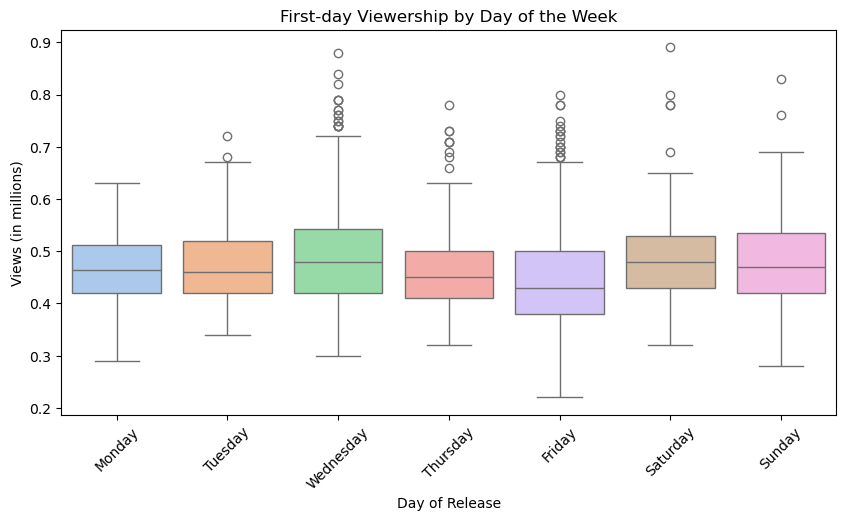

In [93]:
# First-day viewership by day of week
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='dayofweek', y='views_content',
            order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
            palette='pastel',hue=None)
plt.title('First-day Viewership by Day of the Week')
plt.xlabel('Day of Release')
plt.ylabel('Views (in millions)')
plt.xticks(rotation=45)
plt.show()


/var/folders/qn/pvyqmzfs4l7c6j9lg9ks9_x00000gn/T/ipykernel_1710/4037163843.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='season', y='views_content',


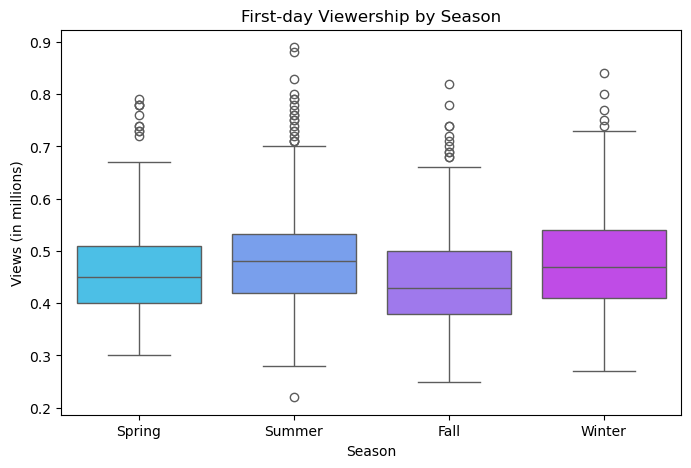

In [95]:
# Viewership based on season of release
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='season', y='views_content', 
            order=['Spring', 'Summer', 'Fall', 'Winter'], palette='cool',hue=None)
plt.title('First-day Viewership by Season')
plt.xlabel('Season')
plt.ylabel('Views (in millions)')
plt.show()


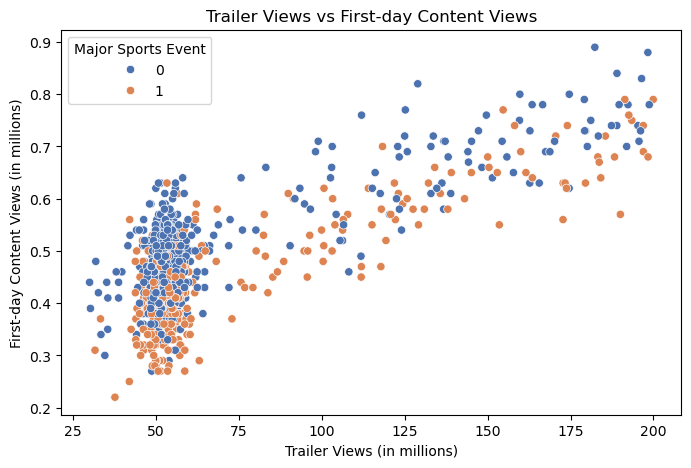

In [97]:
# Correlation between trailer views and first-day content views
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='views_trailer', y='views_content', hue='major_sports_event', palette='deep')
plt.title('Trailer Views vs First-day Content Views')
plt.xlabel('Trailer Views (in millions)')
plt.ylabel('First-day Content Views (in millions)')
plt.legend(title='Major Sports Event')
plt.show()


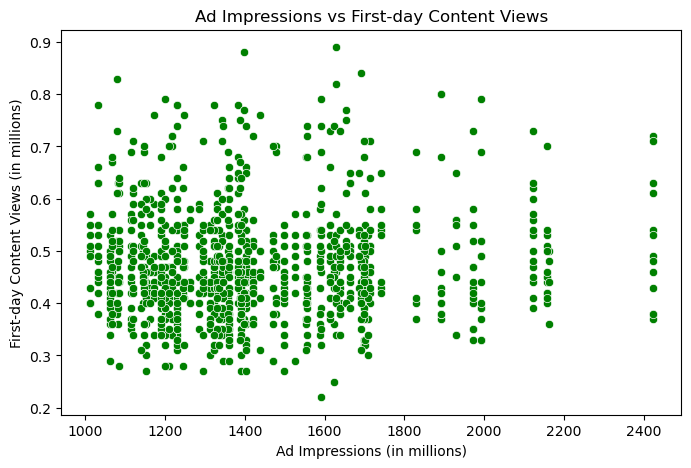

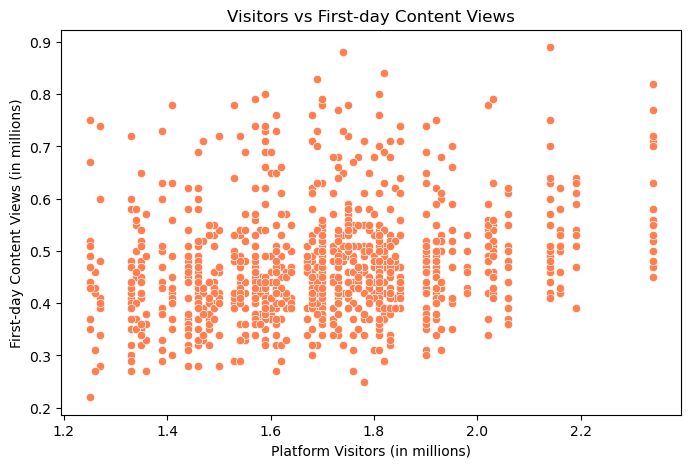

In [104]:
# Relationship between ad impressions and viewership
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='ad_impressions', y='views_content', color='green')
plt.title('Ad Impressions vs First-day Content Views')
plt.xlabel('Ad Impressions (in millions)')
plt.ylabel('First-day Content Views (in millions)')
plt.show()

# Relationship between platform visitors and viewership
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='visitors', y='views_content', color='coral')
plt.title('Visitors vs First-day Content Views')
plt.xlabel('Platform Visitors (in millions)')
plt.ylabel('First-day Content Views (in millions)')
plt.show()



In [106]:
# Create a pipeline with preprocessing and linear regression
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['genre', 'dayofweek',
                                                   'season'])])),
                ('regressor', LinearRegression())])

In [108]:
# Predict and evaluate
y_pred = model.predict(X_test)
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2 Score:", r2_score(y_test, y_pred))

RMSE: 0.050027871071829884
R2 Score: 0.7743076305248303


In [110]:
# Extract coefficients
reg = model.named_steps['regressor']
ohe = model.named_steps['preprocessor'].named_transformers_['cat']

# Get feature names
encoded_features = ohe.get_feature_names_out(categorical_cols)
all_features = list(encoded_features) + [col for col in X.columns if col not in categorical_cols]

# Create a DataFrame for coefficients
coef_df = pd.DataFrame({
    'Feature': all_features,
    'Coefficient': reg.coef_
})

coef_df.sort_values(by='Coefficient', ascending=False)

,Feature,Coefficient
16,visitors,0.128909
8,dayofweek_Saturday,0.052561
12,dayofweek_Wednesday,0.049532
7,dayofweek_Monday,0.045065
14,season_Summer,0.044605
9,dayofweek_Sunday,0.038818
11,dayofweek_Tuesday,0.032412
15,season_Winter,0.026532
13,season_Spring,0.023201
10,dayofweek_Thursday,0.019637


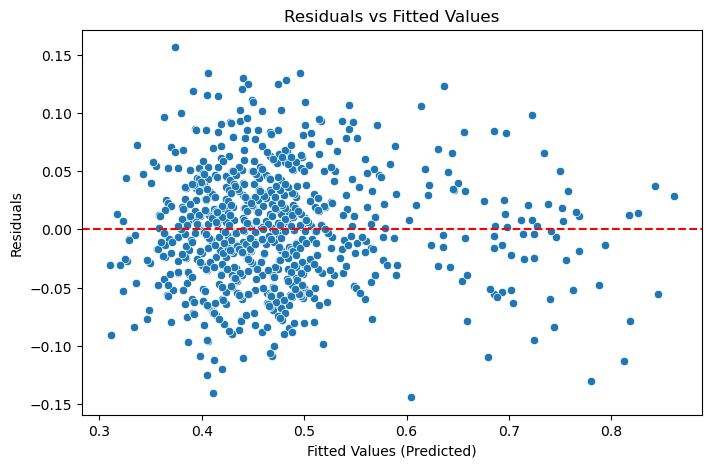

In [112]:
# Predictions & residuals
y_train_pred = model.predict(X_train)
residuals = y_train - y_train_pred

# Residuals vs Fitted plot
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_train_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs Fitted Values')
plt.xlabel('Fitted Values (Predicted)')
plt.ylabel('Residuals')
plt.show()


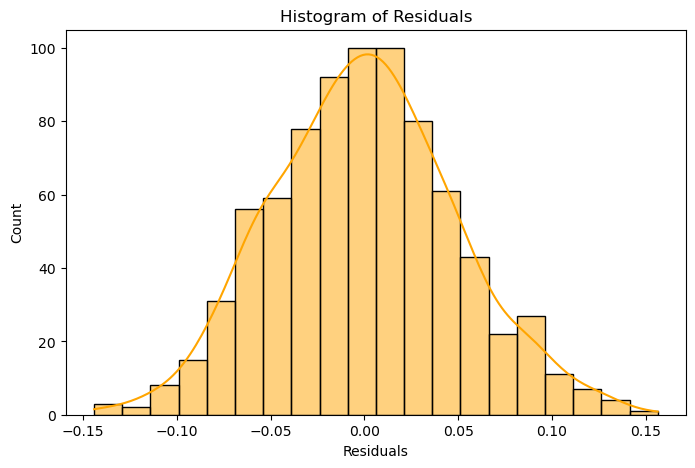

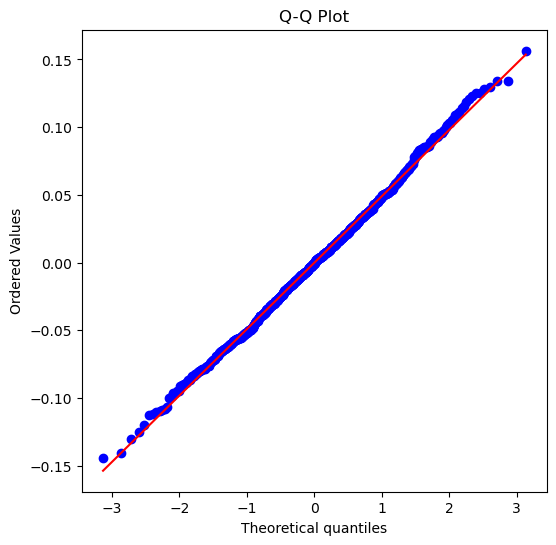

In [114]:
import scipy.stats as stats

# Histogram of residuals
plt.figure(figsize=(8, 5))
sns.histplot(residuals, kde=True, bins=20, color='orange')
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.show()

# Q-Q plot
plt.figure(figsize=(6, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot')
plt.show()


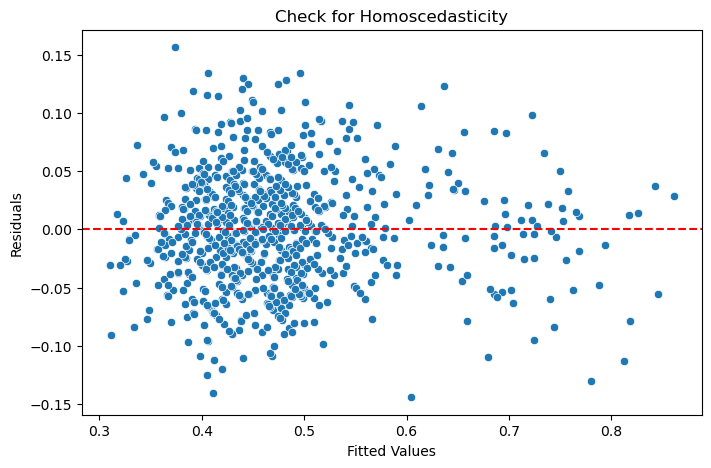

In [116]:
# Check for homoscedasticity using residual vs fitted plot again
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_train_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Check for Homoscedasticity')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()


In [118]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler

# Encode categorical features first for VIF calculation
X_encoded = pd.get_dummies(X, drop_first=True)

# Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

# VIF dataframe
vif_df = pd.DataFrame()
vif_df['Feature'] = X_encoded.columns
vif_df['VIF'] = [variance_inflation_factor(X_scaled, i) for i in range(X_scaled.shape[1])]
vif_df.sort_values(by='VIF', ascending=False)


,Feature,VIF
7,genre_Others,2.721951
10,genre_Thriller,1.932870
4,genre_Comedy,1.907395
5,genre_Drama,1.896472
8,genre_Romance,1.871581
9,genre_Sci-Fi,1.859077
6,genre_Horror,1.856066
18,season_Summer,1.564355
19,season_Winter,1.547323
17,season_Spring,1.513794


In [120]:
from statsmodels.stats.stattools import durbin_watson

dw_stat = durbin_watson(residuals)
print(f'Durbin-Watson statistic: {dw_stat:.3f}')


Durbin-Watson statistic: 2.038


In [135]:
### 📝 Summary of Linear Regression Assumption Checks:

Linearity: Checked using residuals vs fitted values should appear randomly scattered.
Normality: Histogram and Q plot residuals should be roughly normally distributed.
Homoscedasticity: Residuals should show constant variance across predicted values.
Multicollinearity: VIF should be below 5 to 10. High values may require feature elimination.
Autocorrelation: Durbin Watson statistic should be around 2.

These checks help ensure the validity and interpretability of your regression results.


SyntaxError: invalid syntax (112028140.py, line 3)

In [137]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Predictions
y_test_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)


In [139]:
# Evaluation metrics
def evaluate_model(y_true, y_pred, dataset_name="Test"):
    print(f"\n📘 {dataset_name} Set Metrics:")
    print(f"R2 Score: {r2_score(y_true, y_pred):.4f}")
    print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_true, y_pred):.4f}")
    print(f"Mean Squared Error (MSE): {mean_squared_error(y_true, y_pred):.4f}")
    print(f"Root Mean Squared Error (RMSE): {mean_squared_error(y_true, y_pred, squared=False):.4f}")

# Evaluate on training and test sets
evaluate_model(y_train, y_train_pred, "Train")
evaluate_model(y_test, y_test_pred, "Test")



📘 Train Set Metrics:
R2 Score: 0.7868
Mean Absolute Error (MAE): 0.0389
Mean Squared Error (MSE): 0.0024
Root Mean Squared Error (RMSE): 0.0489

📘 Test Set Metrics:
R2 Score: 0.7743
Mean Absolute Error (MAE): 0.0399
Mean Squared Error (MSE): 0.0025
Root Mean Squared Error (RMSE): 0.0500


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


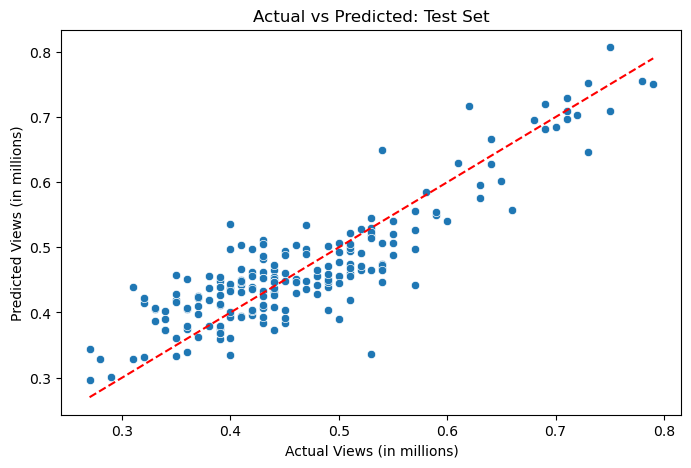

In [141]:
# Actual vs predicted plot
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test, y=y_test_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red')
plt.title('Actual vs Predicted: Test Set')
plt.xlabel('Actual Views (in millions)')
plt.ylabel('Predicted Views (in millions)')
plt.show()


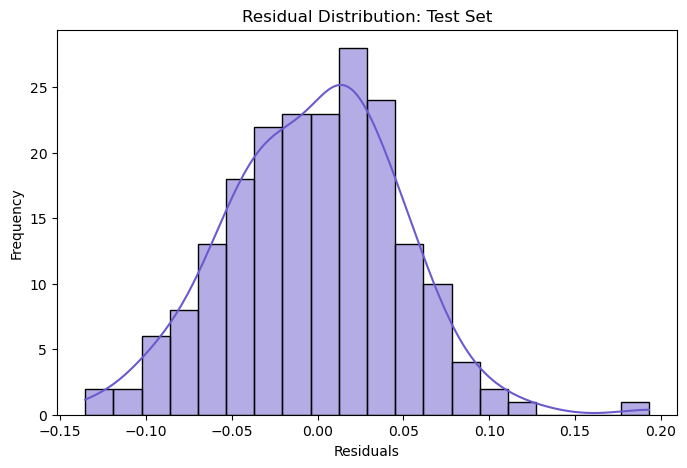

In [143]:
# Residual plot for test set
residuals_test = y_test - y_test_pred
plt.figure(figsize=(8, 5))
sns.histplot(residuals_test, kde=True, bins=20, color='slateblue')
plt.title('Residual Distribution: Test Set')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()


In [147]:
### 🔍 Model Evaluation Summary

R² Score: Measures how well the model explains variance in target. Closer to 1 is better.
MAE (Mean Absolute Error): Average absolute difference between predicted and actual values.
MSE (Mean Squared Error) and RMSE: Penalize larger errors. RMSE is interpretable in the same unit as the target.

- Visualizing actual vs predicted helps assess accuracy and model fit.
- Residual distribution helps confirm that errors are centered around zero with normal spread.

Evaluating on both training and test sets helps check for overfitting.


SyntaxError: invalid character '²' (U+00B2) (3220554800.py, line 3)

/var/folders/qn/pvyqmzfs4l7c6j9lg9ks9_x00000gn/T/ipykernel_1710/3595264648.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=coef_df, x='Coefficient', y='Feature', palette='coolwarm')


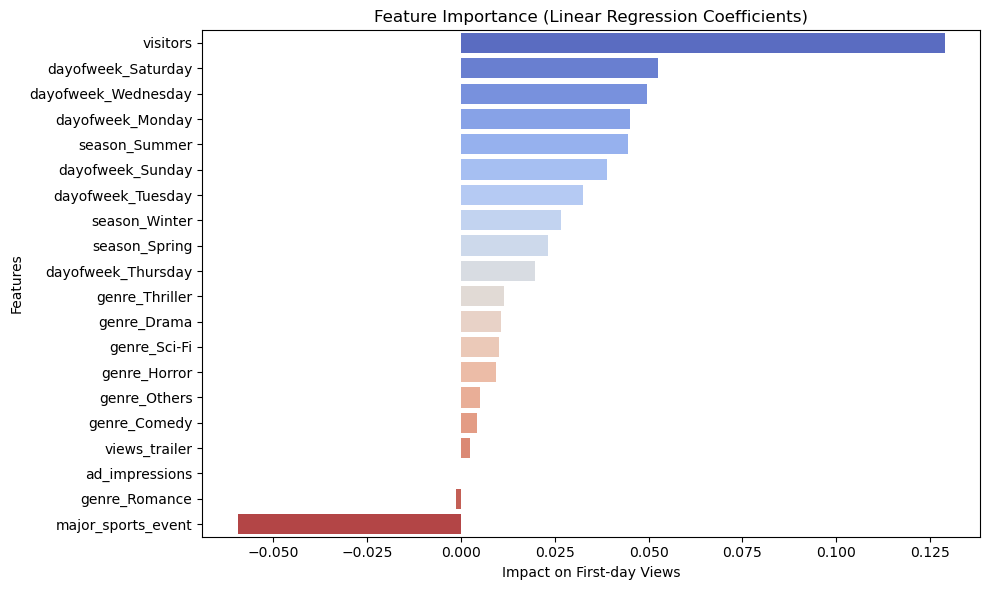

In [151]:
# Extract encoded feature names
ohe = model.named_steps['preprocessor'].named_transformers_['cat']
encoded_cat_cols = ohe.get_feature_names_out(['genre', 'dayofweek', 'season'])

# Combine with remaining numeric features
all_features = list(encoded_cat_cols) + ['visitors', 'ad_impressions', 'major_sports_event', 'views_trailer']

# Get coefficients
coefs = model.named_steps['regressor'].coef_
coef_df = pd.DataFrame({'Feature': all_features, 'Coefficient': coefs})
coef_df = coef_df.sort_values(by='Coefficient', ascending=False)

# Visualize feature importance
plt.figure(figsize=(10, 6))
sns.barplot(data=coef_df, x='Coefficient', y='Feature', palette='coolwarm')
plt.title('Feature Importance (Linear Regression Coefficients)')
plt.xlabel('Impact on First-day Views')
plt.ylabel('Features')
plt.tight_layout()
plt.show()


In [174]:
### 🔍 Actionable Insights & Recommendations

1. Trailer Views:
   Strong positive correlation with first day views.
   Recommendation: Increase trailer promotions on social media and in app banners to boost interest.

2. Ad Impressions:
   Positively associated with first day viewership.
   Recommendation: Invest in targeted ad campaigns close to release day.

3. Visitors:
   Higher average visitors in the past week leads to more views.
   Recommendation: Push more users to the platform with pre release notifications or discounts.

4. Genre Effects:
    Certain genres (e.g., Thriller, Sci Fi) may outperform others.
    Recommendation: Prioritize high-performing genres for peak release periods.

5. Day of the Week:
   Content released on Friday and Sunday tends to perform better.
   Recommendation: Optimize content launch days based on user behavior and avoid weekdays like Wednesday.

6. Major Sports Events:
   Slight negative effect on views when a major event is scheduled.
   Recommendation: Avoid launching high-budget content during major sports matches (e.g., IPL, FIFA).


### ✅ Business Takeaways
 OTT success is heavily influenced by user interest metrics, like trailer views and visitors
 Content timing (release day plus season) and external factors (like sports events) must be accounted for in marketing strategies.
 Use this model to forecast viewership and adjust marketing spends accordingly to maximize ROI.



IndentationError: unindent does not match any outer indentation level (<string>, line 29)